# Linear regression with Gradient Descent from scratch

Last updated vlaue of w0 & w1 are:  4.401559093514599 -0.6600409503434955


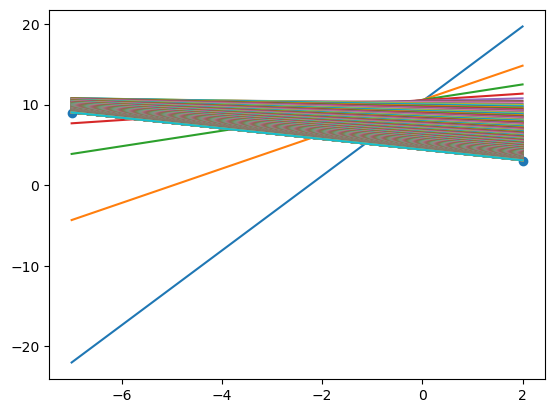

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

x1 = [2,3]
x2 = [-7, 9]

# The data are given as list of lists (2d list)
data = np.array([x1, x2])
# print(type(data), data)

# This is necessary for the allotment of x coordinates of all points to x axis and y coordinates of all points to y axis. T is for transpose
x, y = data.T
# print(x, y)

# plot our data points in X,Y coordinates
# plt.scatter(x, y)
# plt.show()

# Function to calculate gradient wrt w1
def dl_by_dw1(data, w0, w1):
  summation = 0
  for i in range(len(data)):
    x, y = data[i]
    # print("x y in summation dlbydw1", x, y, ((y - w0 - w1*x) * x))
    summation += ((y - w0 - w1*x) * x)
  # print("\nsummation in dlbydw1 is : ", summation)
  return (-2/len(data)) * summation

# Function to calculate gradient wrt w0
def dl_by_dw0(data, w0, w1):
  summation = 0
  for i in range(len(data)):
    x, y = data[i]
    # print("x y in summation dlbydw0", x, y, (y - w0 - w1*x))
    summation += (y - w0 - w1*x)
  # print("\nsummation in dlbydw0 is : ", summation)
  return (-2/len(data)) * summation

# These are the parameters initialized, w0 for c & w1 for m, making the target function as as y = w0 + w1x
w1 = 10
w0 = 10
eta = 0.01
number_of_iterations = 300

# Calculating y_hat for the initial line plot
y1_hat = w0 + w1 * data[0][0]
y2_hat = w0 + w1 * data[1][0]

# Displaying initial values of parameters and y1_hat & y2_hat
# print('initial w0 & w1 are', w0, w1)
# print('initial y1_hat & y2_hat are', y1_hat, y2_hat)

# plot our data points in X,Y coordinates
plt.scatter(x, y)

# Plotting the initial line before calculating gradients
# plt.plot([data[0][0], data[1][0]], [y1_hat, y2_hat])

while(number_of_iterations):

  # Calculated gradients
  calculated_dl_by_dw1 = dl_by_dw1(data, w0, w1)
  calculated_dl_by_dw0 = dl_by_dw0(data, w0, w1)

  # Update rule to calculate updated parameters
  w1 = w1 - eta * calculated_dl_by_dw1
  w0 = w0 - eta * calculated_dl_by_dw0

  # Calculating updated y_hat
  y1_hat = w0 + w1 * data[0][0]
  y2_hat = w0 + w1 * data[1][0]

  # Display updated values of parameters
  # print('\nnew w0 & w1 are', w0, w1)

  # Display updated values of y1_hat & y2_hat
  # print('new y1_hat & y2_hat are', y1_hat, y2_hat)

  # Plotting the line
  plt.plot([data[0][0], data[1][0]], [y1_hat, y2_hat])

  number_of_iterations -= 1

print('Last updated vlaue of w0 & w1 are: ', w0, w1)
plt.show()


# Linear regression using SGDRegressor from scikit learn

Last updated vlaue of w0 & w1 are:  4.295475301361453 -0.6707427939063626


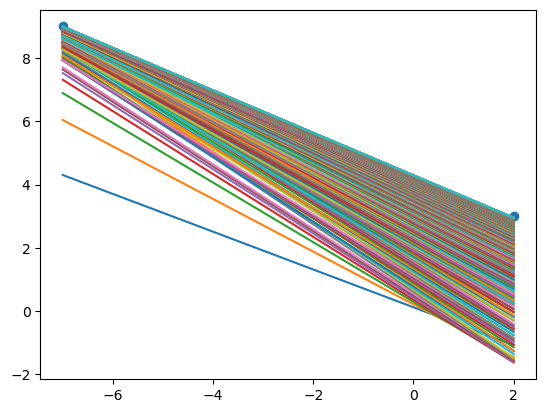

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor


x = np.array([2, -7]).reshape(-1, 1)
y = np.array([3, 9])


model = SGDRegressor(learning_rate="constant", eta0=0.01, max_iter=1, tol=None) # tolerence for early stopping set to None

plt.scatter(x, y)

# Number of updates (iterations)
iterations = 300

# Train model with manual iteration
for i in range(iterations):
    model.partial_fit(x, y)  # Update weights incrementally, it continues training from the existing weights wheres fit() resets internal state each time
    
    # Get updated parameters
    w1 = model.coef_[0]
    w0 = model.intercept_[0]

    # Calculate predicted y-values for the regression line
    y_pred = w0 + w1 * x

    # Plot the updated line
    plt.plot(x, y_pred)

print('Last updated vlaue of w0 & w1 are: ', w0, w1)